In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


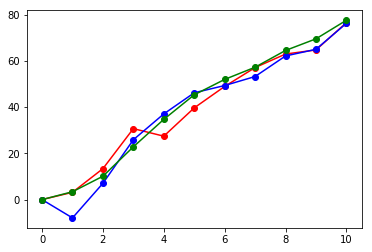

In [84]:
# constant velocity
def simulation(x0, F, H, Q, R, ntime=100):
    w = np.random.multivariate_normal(mean=[0,0], cov=Q, size=ntime).T
    v = np.random.multivariate_normal(mean=[0,0], cov=R, size=ntime).T
    x = np.zeros([2, ntime+1])
    z = np.zeros([2, ntime+1])
    x[:,0] = x0[:,0]
    z[:,0] = x0[:,0]
    for i in range(ntime):
        x[:,i+1] = np.dot(F, x[:,i]) + w[:,i]
        z[:,i+1] = np.dot(H, x[:,i+1]) + v[:,i]    
    return x, z

def prediction(x, P, F, Q):
    return np.dot(F, x), np.dot(np.dot(F, P), F.T) + Q
    
def update(x, z, P, H, R):
    S = np.linalg.inv(np.dot(np.dot(H, P), H.T) + R)
    K = np.dot(np.dot(P, H.T), S)
    xn = x + np.dot(K, z.reshape([2,1])-np.dot(H, x))
    Pn = np.dot((np.identity(2) - np.dot(K, H)), P)
    return K, xn, Pn


dtime = 1.0
x0 = np.array([0, 10.0]).reshape([2,1])
F  = np.array([[1, dtime], [0, 1]])
H  = np.array([[1, 0], [0, 1]])
Q  = np.array([[20, 0], [0, 1.0]])
R  = np.array([[40, 0], [0, 2]])
P0 = np.array([[1,0],[0,1]])

x, z = simulation(x0, F, H, Q, R, ntime=10)

xest = z * 0
xest[:,0] = z[:,0]
for i in range(1, z.shape[-1]):
    xpred, ppred = prediction(xest[:,i-1].reshape([2,1]), P0, F, Q)
    K, xn, P0 = update(xpred, z[:,i], ppred, H, R)
    xest[:,i] = xn[:,0]

plt.plot(x[0,:], 'r-o')
plt.plot(z[0,:], 'b-o')
plt.plot(xest[0,:], 'g-o')


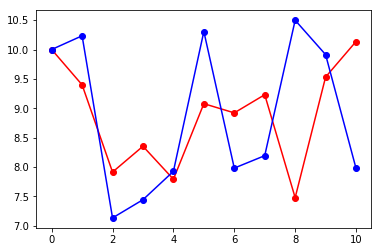

In [67]:
plt.plot(x[1,:], 'r-o')
plt.plot(z[1,:], 'b-o')
